# Final Project: Methods for Population Growth Projections

## Logistic Growth

Below is the standard logistic growth model, defined as $P(t) = \frac{K N_0 e^{\gamma t}}{K + N_0 (e^{\gamma t} - 1)}$

In [2]:
import pandas as pd
import numpy as np
from scipy import integrate
from scipy import optimize
import matplotlib.pyplot as plt

pop_change_df = pd.read_csv('data/pop_change.csv', index_col=0, header=0, skiprows=[], thousands=',')
pop_change_df.apply(pd.to_numeric)

,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,2000_POPULATION,2010_POPULATION
STATE_OR_REGION,,,,,,,,,,,
United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,281421906,308745538


In [3]:
country_total = pop_change_df.as_matrix()[0]

In [4]:
times = np.arange(1910,2020,10)

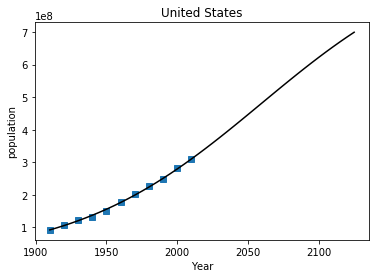

In [5]:
dN = (country_total[2:]-country_total[:-2])/(times[2:]-times[:-2])
P = dN / country_total[1:-1]
X = np.asarray([np.ones(9), country_total[1:-1]]).transpose()
Y = np.asarray(P)
alpha = np.linalg.lstsq(X,Y)[0]
gamma = alpha[0]
K = (-gamma) / alpha[1]
    
# compute the model estimate for the population development
t_estimate = np.arange(1910, 2130, 5)
N0=country_total[0]
t_model=t_estimate-1910
N=K*(N0/K)*np.exp(gamma*t_model)/(1+(N0/
K)*(np.exp(gamma*t_model)-1))
plt.figure()
plt.plot(times, country_total, 's')
plt.plot(t_estimate, N, 'k')
plt.xlabel('Year')
plt.ylabel('population')
plt.title('United States')
plt.show()

## Logistic Growth Augmented with Migration

In [6]:
pop_change_df = pd.read_csv('data/mig.csv', index_col=0, header=0, skiprows=[], thousands=',')
pop_change_df.apply(pd.to_numeric)

,SMPOPNETMUSA
DATE,
1952,960424
1957,2112299
1962,1829274
1967,1549465
1972,2940497
1977,3926811
1982,3402260
1987,3428740
1992,4516808


## Modified Lotka-Volterra

In [10]:
gdp_data = pd.read_csv('data/gdp_new.csv', index_col=0, header=0, sep=',', skiprows=[], thousands=',')
gdp_data.apply(pd.to_numeric)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
World,1.366670e+12,1.421780e+12,1.526940e+12,1.643740e+12,1.800780e+12,1.961770e+12,2.128440e+12,2.264580e+12,2.443210e+12,2.690780e+12,...,5.785850e+13,6.346140e+13,6.016790e+13,6.595460e+13,7.328040e+13,7.489050e+13,7.699300e+13,7.909090e+13,7.478190e+13,7.587170e+13
United States,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,9.425000e+11,1.019900e+12,...,1.447760e+13,1.471860e+13,1.441870e+13,1.496440e+13,1.551790e+13,1.615530e+13,1.669150e+13,1.742760e+13,1.812070e+13,1.862450e+13
United Kingdom,7.232805e+10,7.669436e+10,8.060194e+10,8.544377e+10,9.338760e+10,1.005960e+11,1.070910e+11,1.111850e+11,1.047030e+11,1.126770e+11,...,3.074360e+12,2.890560e+12,2.382830e+12,2.441170e+12,2.619700e+12,2.662090e+12,2.739820e+12,3.022830e+12,2.885570e+12,2.650850e+12


In [14]:
pop_data = pd.read_csv('data/pop_data.csv', index_col=0, header=0, sep=',', skiprows=[], thousands=',')
pop_data.apply(pd.to_numeric)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
World,3032160395,3073368588,3126509808,3191786431,3257459749,3324545317,3394783656,3464689184,3535355320,3610178790,...,6683228246,6766302523,6849573246,6932880892,7014998805,7099548883,7185078354,7271228018,7357369754,7444027227
United States,180671000,183691000,186538000,189242000,191889000,194303000,196560000,198712000,200706000,202677000,...,301231207,304093966,306771529,309348193,311663358,313998379,316204908,318563456,320896618,323127513
United Kingdom,52400000,52800000,53250000,53650000,54000000,54348050,54648500,54943600,55211700,55441750,...,61322463,61806995,62276270,62766365,63258918,63700300,64128226,64613160,65128861,65595565


In [24]:
gdp_real_data = gdp_data.as_matrix()
pop_real_data = pop_data.as_matrix()

In [80]:
par_init = [0.003, 5.2, -55e-18, 0.031, -2e-22] # Initial values provided by report
par_est = [0.003, 5.2e-6, -55e-17, 0.031, -2e-22] # Adjustments based on hypothesis

x0 = [pop_real[0], gdp_real[0]] # Set initial values to first data point
# x0 = [1.15e9, 0.21e12]

def model(t, data, params):   
    a1, a3k1, a2, b1, b2 = params
    
    x0 = [data[0][0], data[1][0]]
    
    def dpdt(x, t):
        return (a1*x[0] + a3k1*x[1] + a2*x[0]*x[1])
    def dgdt(x, t):
        return b1*x[1] + b2*x[0]*x[1]
    def dxdt(x, t):
        return np.array([dpdt(x, t),  dgdt(x, t)])
    
    return integrate.odeint(dxdt, x0, t).T # Transpose to get population and GDP in separate arrays

def score(params, t, data):
    model_data = model(t, data, params)
    
    return np.sum((model_data[0] - data[0])**2 + (model_data[1] - data[1])**2)

Optimization terminated successfully.
         Current function value: 2264235006875074224220798976.000000
         Iterations: 347
         Function evaluations: 719
[  3.27084093e-03   4.92657378e-06  -1.15210182e-16   7.62079210e-02
  -3.28776555e-22]


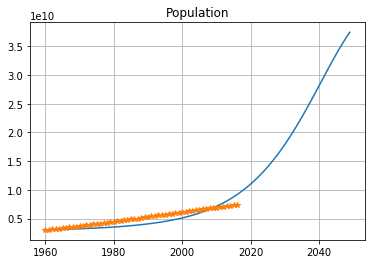

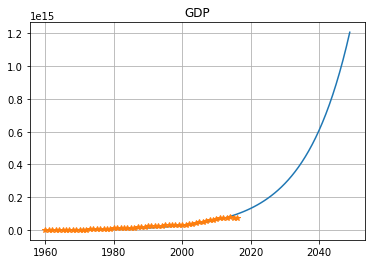

[  7.57722820e-03  -1.16808101e-06  -1.09762085e-16   6.65041713e-02
  -2.42728364e-22]


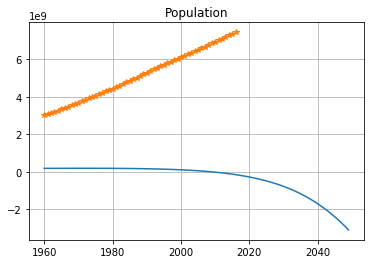

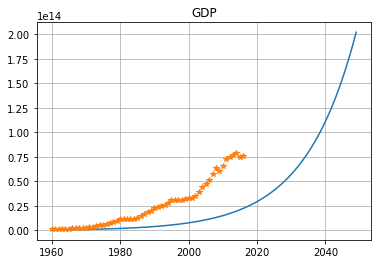

Optimization terminated successfully.
         Current function value: 9044158668497748286767104.000000
         Iterations: 386
         Function evaluations: 831
[  3.42379386e-03  -1.98202922e-06  -4.36553751e-17   7.11471196e-02
  -2.27262698e-22]


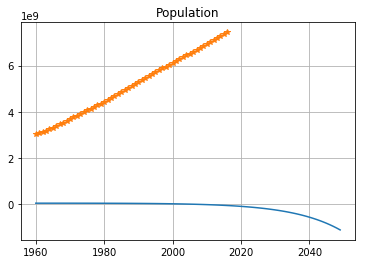

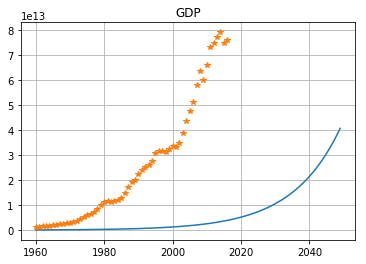

In [81]:
t = np.arange(1960, 2017, 1)

for (idx, country_gdp) in enumerate(gdp_real_data):
    country_pop = pop_real_data[idx]
    data = np.asarray([country_pop, country_gdp])
    # result = optimize.leastsq(score, par_init, args=(t, data))
    result = optimize.fmin(score, x0=par_init, args=(t, data))
    print(result)
    
    t_plot = np.arange(1960, 2050, 1)
    
    plt.figure()
    plt.title("Population")
    plt.grid()
    plt.plot(t_plot, model(t_plot, data, result)[0])
    plt.plot(np.arange(1960, 2017, 1), pop_real, '*')
    plt.show()
    
    plt.figure()
    plt.grid()
    plt.title("GDP")
    plt.plot(t_plot, model(t_plot, data, result)[1])
    # plt.plot(np.arange(1960, 2017, 1), res.T[1][110:-133])
    plt.plot(np.arange(1960, 2017, 1), gdp_real, '*')
    plt.plot()
    plt.show()

[1150000000.0, 210000000000.0]


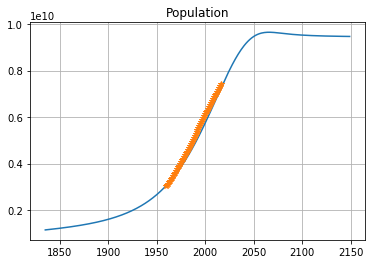

In [73]:
t = np.arange(1835, 2150, 1)

x0 = [[1.15e9], [0.21e12]]

plt.figure()
plt.title("Population")
plt.grid()
plt.plot(t, model(t, x0, par_est)[0])
plt.plot(np.arange(1960, 2017, 1), pop_real, '*')
plt.show()

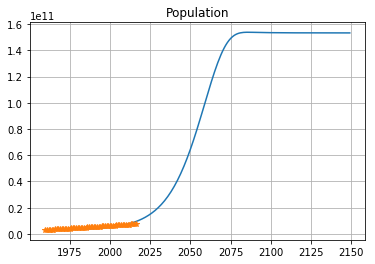

In [30]:
t = np.arange(1960, 2150, 1)
x0 = [pop_real[0], gdp_real[0]]

plt.figure()
plt.title("Population")
plt.grid()
plt.plot(t, model(t, result)[0])
plt.plot(np.arange(1960, 2017, 1), pop_real, '*')
plt.show()

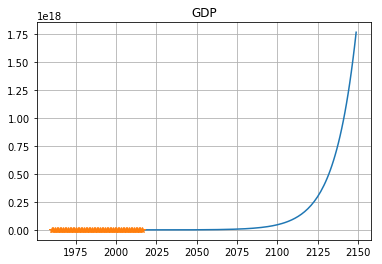

In [31]:
plt.figure()
plt.grid()
plt.title("GDP")
plt.plot(t, model(t, result)[1])
# plt.plot(np.arange(1960, 2017, 1), res.T[1][110:-133])
plt.plot(np.arange(1960, 2017, 1), gdp_real, '*')
plt.plot()
plt.show()

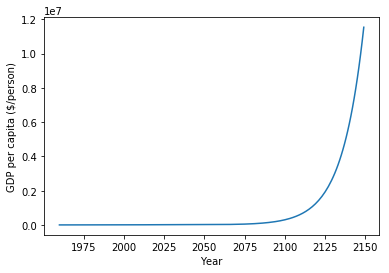

In [32]:
plt.figure()
plt.xlabel('Year')
plt.ylabel('GDP per capita ($/person)')
plt.plot(t, model(t, result)[1]/model(t, result)[0])
plt.show()